# Grid

Task is to load a grid from a given black and white image (threshold is applied otherwise). First do it using notebook execution, then using class


## Notebook execution

Performing notebook execution


In [1]:
# Import everything
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from copy import deepcopy

%matplotlib inline


In [2]:
!tree

.
├── data
│   └── circuit.png
├── grid_loader.ipynb
├── grid_loader.py
└── __pycache__
    └── grid_loader.cpython-37.pyc

2 directories, 4 files


## Non-Class implementation

Do the following steps

1. Read image
2. Show grid
3. Modify grid by adding obstacles


Loaded image of size 766 x 557, with grid resolution 0.05 m / pixel, it is 38.300 x 27.850000 (in meters)


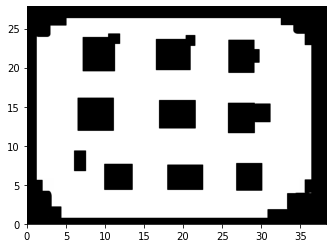

In [3]:
img_path = "./data/circuit.png"
grid_res = 0.05 # m / pixel
img = Image.open(img_path).convert("L").transpose(Image.FLIP_TOP_BOTTOM)    # Load image (origin at bottom)
w, h = img.size
w_m, h_m = np.array([w, h]) * grid_res
print(f"Loaded image of size {w} x {h}, with grid resolution {grid_res} m / pixel, it is {w_m:.3f} x {h_m:3f} (in meters)")
# Convert to numpy array
# img is 0 - black, 255 - white. We need 0 - free (white), 1 - occupied (black)
# img is W x H (Y by X), we need X x Y (H x W) indexing
grid_data = 1 - np.array(img).T/255

# Show image
plt.figure()
plt.imshow(grid_data.T, cmap=plt.cm.gray_r, origin='lower', extent=[0, w_m, 0, h_m])


Now, add an obstacle to the already existing grid

Obstacle at 280, 200 to 300, 400
Obstacle at 660, 320 to 700, 340


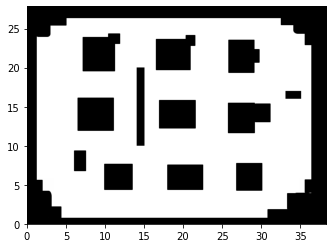

In [4]:
obstacles = [   # array of [x1, y1, x2, y2] obstacle corners
    [14, 10, 15, 20],
    [33, 16, 35, 17]
]
for obstacle in obstacles:
    (x1, y1, x2, y2) = (np.array(obstacle) / grid_res).astype('int')
    print(f"Obstacle at {x1}, {y1} to {x2}, {y2}")
    grid_data[x1:x2, y1:y2] = 1

# Show the modified grid
plt.figure()
plt.imshow(grid_data.T, cmap=plt.cm.gray_r, origin='lower', extent=[0, w_m, 0, h_m])


## Class Implementation

In [5]:
from grid_loader import Grid


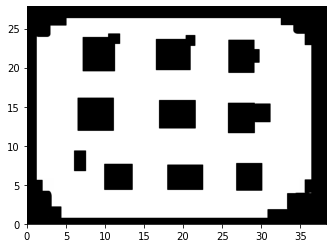

In [6]:
# Load everything from class
grid_obj = Grid()
grid_obj.load_from_image(img_path)
grid_obj.show_grid()

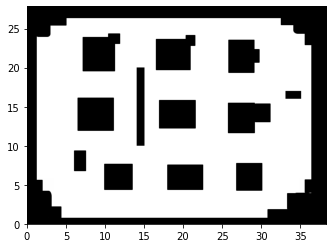

In [7]:
another_grid = deepcopy(grid_obj)
another_grid.add_obstacles(obstacles)
another_grid.show_grid()

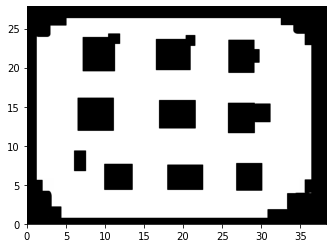

In [8]:
grid_obj.show_grid()